In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Simple Linear Regression

<div style="display: flex;">
    <img src="SimpleLR.jpg" alt="Simple Linear Regression 1" style="width:400px; margin-right: 10px;"/>
    <img src="SimpleLR2.jpg" alt="Simple Linear Regression 2" style="width:400px;"/>
</div>


In [2]:
class SimpleLinearRegression:
    def __init__(self):
        # set our model params to None because we will update it below in 'fit' function
        self.slope = None
        self.intercept = None

    def fit(self, X,y):
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        sigma_x = np.sum(X)
        sigma_xy = np.sum(X*y)
        sigma_x2 = np.sum(X*X)

        numerator = sigma_xy - mean_y*sigma_x
        denominator = sigma_x2 - mean_x*sigma_x

        self.slope = numerator/denominator
        self.intercept = mean_y - self.slope*(mean_x)
        # we don't return anything but updated the params which we initialised above in __init__

    def predict(self,x_test):
        y_hat = self.slope*x_test + self.intercept
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse





X.shape:  (49,)
y.shape:  (49,)


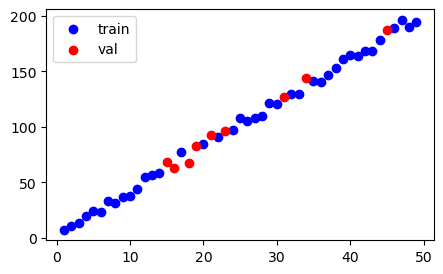

In [3]:
x = np.arange(1,50)
n = x.shape[0]
m = 4
b = 3
noise = np.random.randn(n)*4
y = m*x+b + noise
print('X.shape: ',x.shape)
print('y.shape: ', y.shape)


# Divide dataset into train and val
val_percent = 0.2
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = x[train_indices], y[train_indices]
X_val, y_val = x[val_indices], y[val_indices]


plt.figure(figsize = (5,3))
plt.scatter(X_train,y_train, color ='blue', label = 'train')
plt.scatter(X_val,y_val, color ='red', label = 'val')
plt.legend()
plt.show()

Slope:  3.963385605715187
Intercept:  2.9704412842560117
Test MSE:  26.126270229215255


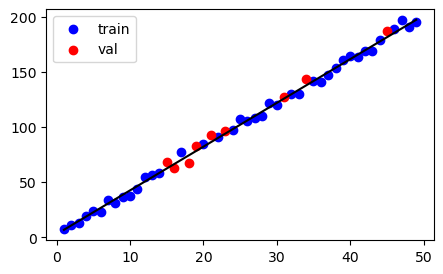

In [4]:
# Initalize model
model = SimpleLinearRegression()
# fit the model
model.fit(X_train,y_train)
# see the params found
print('Slope: ', model.slope)
print('Intercept: ', model.intercept)
# get_preds
y_preds = model.predict(X_val)
# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

# print line of best fit
xmin = np.min(x); ymin = model.slope * xmin + model.intercept
xmax = np.max(x); ymax = model.slope * xmax + model.intercept

plt.figure(figsize = (5,3))
plt.plot([xmin, xmax], [ymin, ymax], color='black')
plt.scatter(X_train,y_train, color ='blue', label = 'train')
plt.scatter(X_val,y_val, color ='red', label = 'val')
plt.legend()
plt.show()

### Multiple Linear Regression in Closed form

- theta = (X^T X)-1 XTy
- this has x0 = 1

<img src="LR-closed.jpg" alt="Linear Regression with GD" style="width:400px;"/>


In [5]:
class LinearRegressionClosedForm:
    def __init__(self):
        self.theta = None
    def fit(self,X,y):
        self.theta = np.linalg.pinv(X.T @ X)@X.T@y
        # use pinv instead of inv is X.T X is non-invertible
        # pinv making a HUGE differene in output

    def predict(self,x_test):
        y_hat = x_test@self.theta
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse


In [6]:
X1 = np.linspace(start=1,stop=21, num=100); print('X1.shape', X1.shape)
X2 = np.linspace(start=5,stop=25, num=100); print('X2.shape', X2.shape)
# X1 and X2 needs to be of same size

n = X1.shape[0]
m1 = 3
m2 = 4.5
b1 = 4
b2 = 6
noise = np.random.randn()*0

x0 = np.ones_like(X1); print('x0.shape', x0.shape)

# Multiple Linear Regression
X = np.stack([x0, X1, X2], axis=1); print('X.shape', X.shape)
y = m1*X1 + b1 + m2*X2 + b2 + noise; print('y.shape', y.shape)

# # Simple Linear Regression
# X = np.stack([x0, X1], axis=1); print('X.shape', X.shape)
# y = m1*X1 + b1 + noise; print('y.shape', y.shape)

# Divide dataset into train and val
val_percent = 0.2
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape} ')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape} ')

X1.shape (100,)
X2.shape (100,)
x0.shape (100,)
X.shape (100, 3)
y.shape (100,)
X_train.shape: (80, 3), y_train.shape: (80,) 
X_val.shape: (20, 3), y_val.shape: (20,) 


In [7]:
# Initalize model
model = LinearRegressionClosedForm()
# fit the model
model.fit(X_train,y_train)
# see the params found
print('theta: ', model.theta)
print('theta.shape: ', model.theta.shape)
# get_preds
y_preds = model.predict(X_val)
for gt,pred in zip(y_val, y_preds):
    print('GT: Pred -> ', gt,'->', pred)

# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

theta:  [1.44444444 0.86111111 6.63888889]
theta.shape:  (3,)
GT: Pred ->  62.77272727272728 -> 62.772727272727046
GT: Pred ->  87.01515151515152 -> 87.0151515151513
GT: Pred ->  133.9848484848485 -> 133.98484848484833
GT: Pred ->  162.77272727272725 -> 162.77272727272714
GT: Pred ->  174.89393939393938 -> 174.89393939393926
GT: Pred ->  147.62121212121212 -> 147.62121212121195
GT: Pred ->  164.2878787878788 -> 164.28787878787867
GT: Pred ->  114.2878787878788 -> 114.28787878787861
GT: Pred ->  165.8030303030303 -> 165.80303030303017
GT: Pred ->  161.25757575757575 -> 161.2575757575756
GT: Pred ->  118.83333333333333 -> 118.83333333333316
GT: Pred ->  103.68181818181817 -> 103.68181818181799
GT: Pred ->  143.07575757575756 -> 143.07575757575742
GT: Pred ->  100.65151515151516 -> 100.65151515151496
GT: Pred ->  47.621212121212125 -> 47.621212121211876
GT: Pred ->  70.34848484848484 -> 70.34848484848463
GT: Pred ->  44.59090909090909 -> 44.590909090908845
GT: Pred ->  58.227272727272734 

### Multiple Linear Regression with Gradient Descent

<img src="LR-GD.jpg" alt="Linear Regression with GD" style="width:500px;"/>


In [8]:
class LinearRegressionGD:
    def __init__(self):
        self.theta = None

    def fit(self, X, y, lr=0.0001, itrs=100):
        # init params
        self.theta = np.random.randn(X.shape[1]) # shape: (X.shape[1],)
        for itr in range(itrs):
            y_hat = X@self.theta
            self.theta = self.theta - lr*(X.T@(y_hat-y))

    def predict(self,x_test):
        y_hat = x_test@self.theta
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse



In [9]:
# Initalize model
model = LinearRegressionGD()
# fit the model
model.fit(X_train,y_train, lr=0.00001, itrs=10000)
# see the params found
print('theta: ', model.theta)
print('theta.shape: ', model.theta.shape)
# get_preds
y_preds = model.predict(X_val)
for gt,pred in zip(y_val, y_preds):
    print('GT: Pred -> ', gt,'->', pred)

# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

theta:  [1.57884021 0.89472409 6.60527916]
theta.shape:  (3,)
GT: Pred ->  62.77272727272728 -> 62.77269923597781
GT: Pred ->  87.01515151515152 -> 87.01513400108331
GT: Pred ->  133.9848484848485 -> 133.98485135847525
GT: Pred ->  162.77272727272725 -> 162.77274264203803
GT: Pred ->  174.89393939393938 -> 174.89396002459077
GT: Pred ->  147.62121212121212 -> 147.62122091384708
GT: Pred ->  164.2878787878788 -> 164.28789481485714
GT: Pred ->  114.2878787878788 -> 114.28787311182701
GT: Pred ->  165.8030303030303 -> 165.80304698767623
GT: Pred ->  161.25757575757575 -> 161.25759046921894
GT: Pred ->  118.83333333333333 -> 118.8333296302843
GT: Pred ->  103.68181818181817 -> 103.68180790209335
GT: Pred ->  143.07575757575756 -> 143.0757643953898
GT: Pred ->  100.65151515151516 -> 100.65150355645517
GT: Pred ->  47.621212121212125 -> 47.62117750778686
GT: Pred ->  70.34848484848484 -> 70.34846010007328
GT: Pred ->  44.59090909090909 -> 44.590873162148675
GT: Pred ->  58.227272727272734 ->


<a href="https://github.com/mgupta70/literature/blob/main/Linear%20Regression.pdf"> Click here</a> for more a in-depth dive on Linear Regression :P